In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [6]:
file_path = "Downloads/train.csv/taxi dataset.csv"
df = pd.read_csv(file_path)


In [7]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day']]) + pd.to_timedelta(df['hour_of_day'], unit='h')
df = df.sort_values(by='datetime')
df.set_index('datetime', inplace=True)

In [8]:
df_daily = df[['total_amount']].resample('D').sum()
df_daily['day'] = df_daily.index.day
df_daily['month'] = df_daily.index.month
df_daily['year'] = df_daily.index.year
df_daily['day_of_week'] = df_daily.index.dayofweek


In [9]:
X = df_daily[['day', 'month', 'year', 'day_of_week']]
y = df_daily['total_amount']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [12]:
y_pred = model.predict(X_test)

In [13]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 4110.304025488284


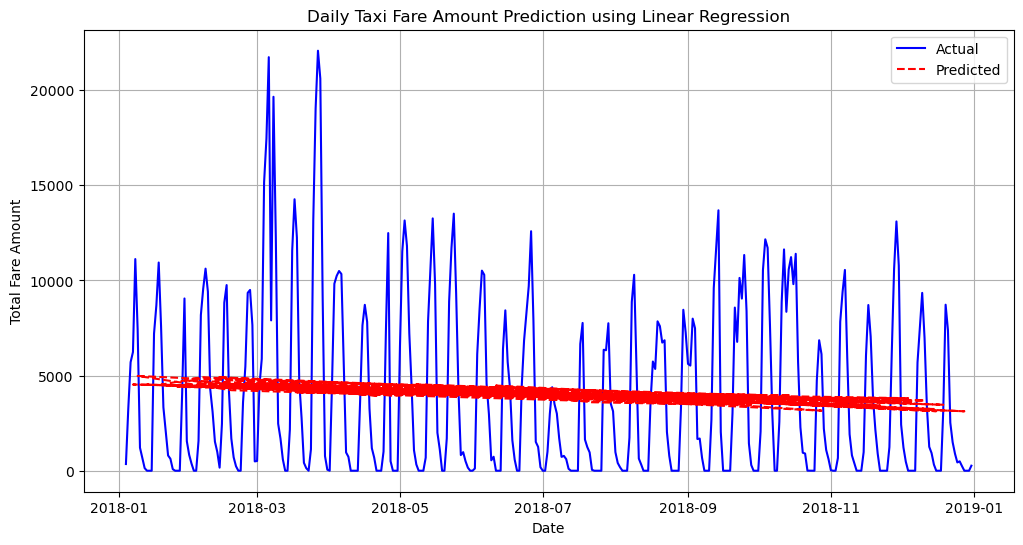

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily['total_amount'], label="Actual", color='blue')
plt.plot(X_test.index, y_pred, label="Predicted", color='red', linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Total Fare Amount")
plt.title("Daily Taxi Fare Amount Prediction using Linear Regression")
plt.legend()
plt.grid()
plt.show()